# Исследование данных  о продажах игр

**Цель исследования — выявить определяющие успешность игры закономерности**

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования**
- 1.Открытие файла и изучение общей информации.
- 2. Подготовка данных.
- 3. Исследовательский анализ данных.
- 4. Составление портрета пользователя каждого региона.
- 5. Проверка гипотез.
- 6. Общий вывод

#### Шаг  Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Вывод*
1. Следует привести название столбцов в нижний регистр
2. Наблюдается наличие пропусков
3. Необходимо поменять тип данных в столбце Year_of_Release к типу даных int, столбец User_Score к типу данных float64

#### Шаг  Подготовка данных

##### Предобработка

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data['name'] = data.name.str.lower()
data['platform'] = data.platform.str.lower()
data['rating'] = data.rating.str.lower()

In [6]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,e


In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Не получалось изменить тип столбца user_score из-за наличия значения tbd, заменяю их на nan

In [11]:
data['user_score']= data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,e10+
16405,freaky flyers,gc,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
year= data[data['year_of_release'].isna()]

In [15]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
data.dropna(subset=['genre','name', 'year_of_release'],inplace=True)

In [17]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

1

In [18]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [19]:
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

'K-A' и 'E10+' - это два значения носящие один и тот же смысл 

In [20]:
data['rating'] = data['rating']. replace ('k-a','e10+')

In [21]:
data['rating'] = data['rating'].fillna('nr')

In [22]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

*Вывод*
1. Привели название столбцов и данных в нижний регистр
2. поменяли тип данных в столбце Year_of_Release на int, столбец User_Score на float64 для удобства работы
3. удалили пропуски в столбцах year_of_release, genre,name их было мало, большое количество продаж они не принесли и заменить каким-либо другим значением невозможно
4. большое количество пропусков было в столбце critic_score, user_score заменить их нет возможноси, поэтому отсавили без изменений
5. удалили дубликат
6. Заменили K-A на E10+ в столбце рейтинг, так как это обозначение одного и того же, заменили nan на nr- без рейтинга 

Пропуски в исходных данных могут возникнуть по техническому и человеческому фактору, на этапе загрузки и выгрузки данных или объединение таблиц

##### Добавление нового стобца с  суммарными продажами во всех регионах

In [23]:
data['total_sales'] = data['na_sales'] +data['eu_sales'] + data['jp_sales'] +data['other_sales']

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nr,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nr,31.38


In [25]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


#### Шаг  Исследовательский анализ данных

##### Cколько игр выпускалось в разные годы

Text(0, 0.5, 'Количество')

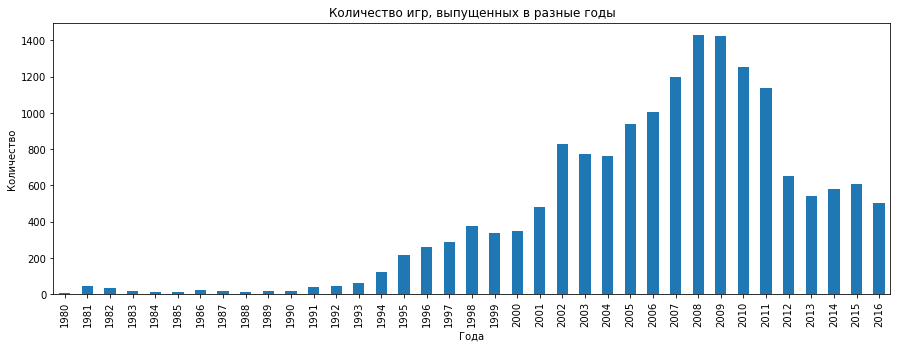

In [26]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', 
                                                     title='Количество игр, выпущенных в разные годы', 
                                                     figsize=(15, 5))
plt.xlabel('Года')
plt.ylabel('Количество')

В период с 1980 по 1993 игры почти не выпускались

##### Как менялись продажи по платформам

Text(0, 0.5, 'суммарнрые продажи')

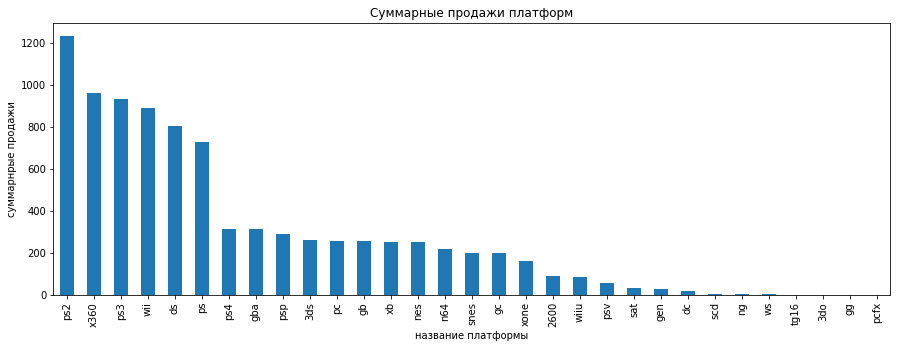

In [27]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize = (15,5),
                                                                                    title='Суммарные продажи платформ')
plt.xlabel('название платформы')
plt.ylabel('суммарнрые продажи')

6 лидеров : PS2, X360, PS3, Wii, DS, PS

In [28]:
platforms = data.pivot_table(index = 'platform', 
                             values = 'total_sales', 
                             aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top_6_platforms = platforms.reset_index()
iloc = top_6_platforms.iloc[0:6]
top_6_platforms = iloc['platform'].unique()

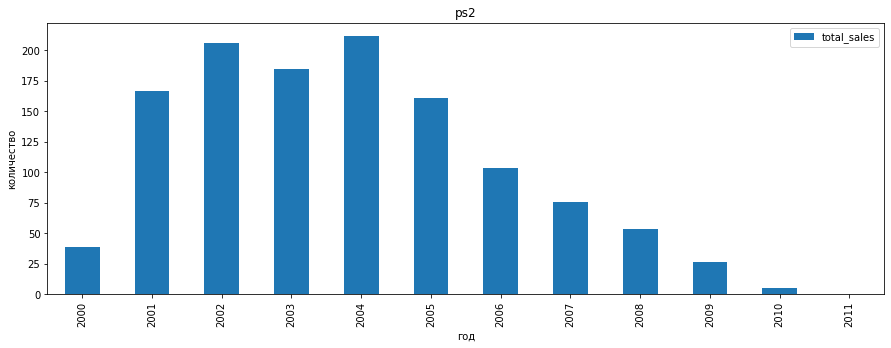

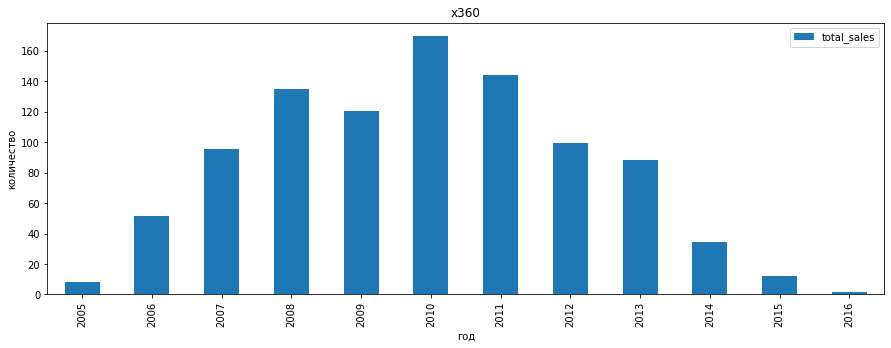

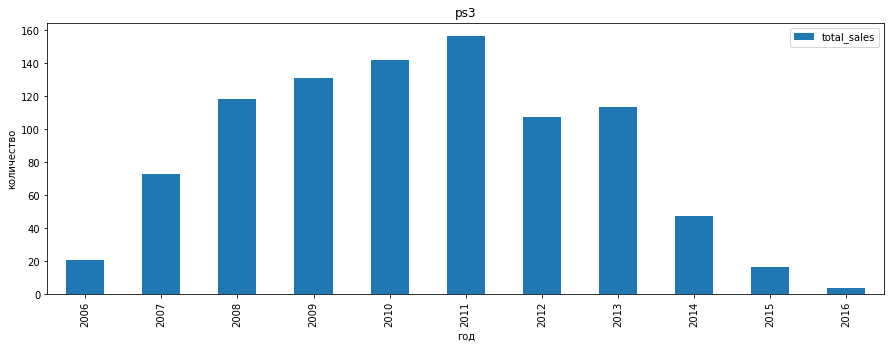

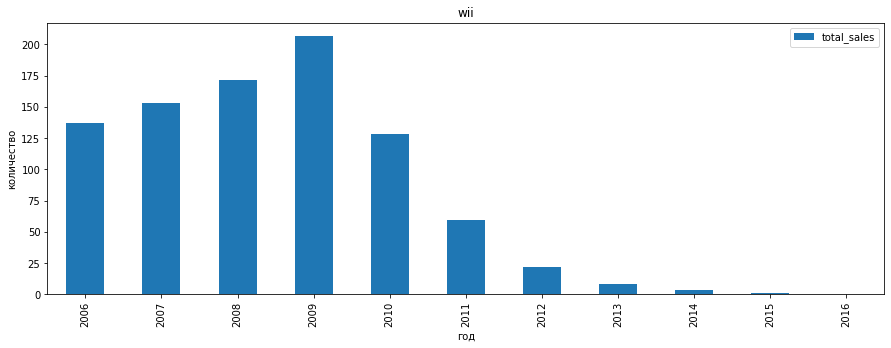

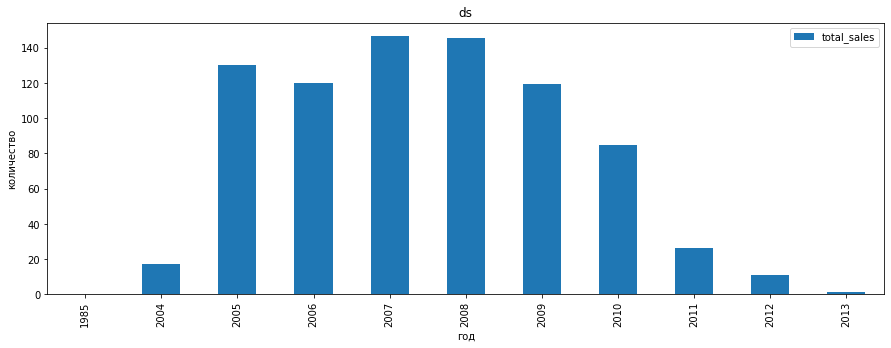

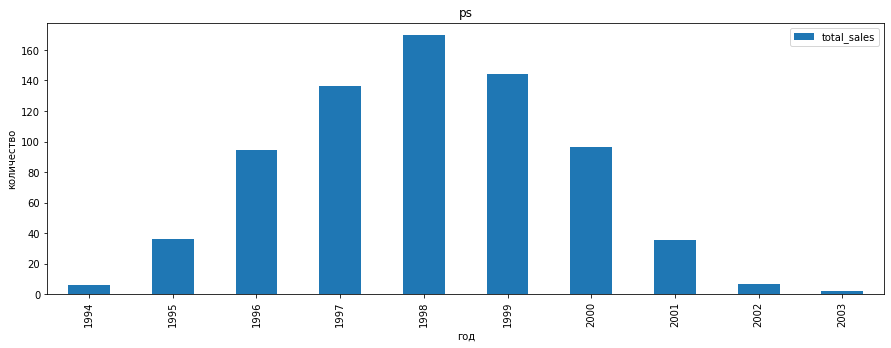

In [29]:
for platform in top_6_platforms:
    ppivot = data[data['platform'] == platform].pivot_table(index = 'year_of_release',
                                                   values = 'total_sales', aggfunc = 'sum').plot.bar(figsize = (15,5),
                                                                                      title='Суммарные продажи платформ')
    plt.title(platform)
    plt.xlabel('год')
    plt.ylabel('количество')

Консоль DS была выпущена в 2004 году. Удаляем анамальные значения

In [30]:
data.loc[((data['platform'] == 'ds') &(data['year_of_release' ] == 1985))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,nr,0.02


In [31]:
data = data.drop (index= 15957)

Больше всего продаж:
- PS2 в 2002, 2004 год
- X360 в 2008, 2010, 2011 год
- PS3 с 2008-2011 года 
- Wii с 2006- 2009 года
- DS 2005, 2007, 2008 год
- PS с 1997-1999 год

Срок, за который появляются и исчезают новые платформы - 10-12 лет. 
Актуальность сохраняется 2-4 года

*Вывод*

Данные с 2014 года могут помочь построить прогноз на 2017 год

##### Актуальный период для прогноза

In [32]:
actual = data.query('year_of_release >= 2014')

##### Какие платформы лидируют по продажам в актуальный период

Text(0, 0.5, 'суммарнрые продажи')

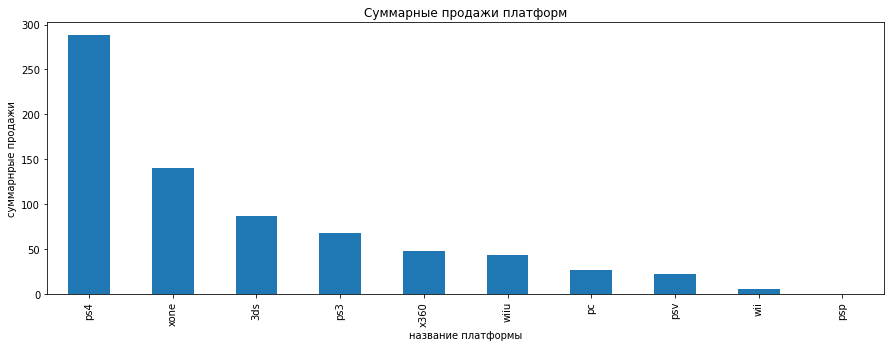

In [33]:
actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize = (15,5),
                                                                                      title='Суммарные продажи платформ', )
plt.xlabel('название платформы')
plt.ylabel('суммарнрые продажи')

В топе появились новые платформы: PS4,3DS, XOne

Рассмотрим платформы, составляюших ТОП-6 (PS4, XOne, 3DS, PS3, X360, WiiU) отдельно 

In [34]:
ttop_6 = (actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False))

ps4


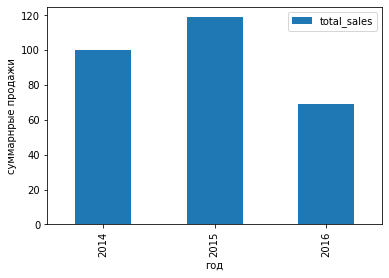

xone


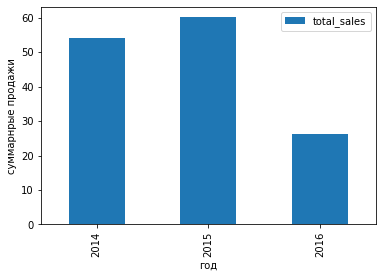

3ds


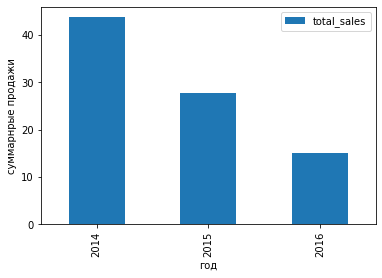

ps3


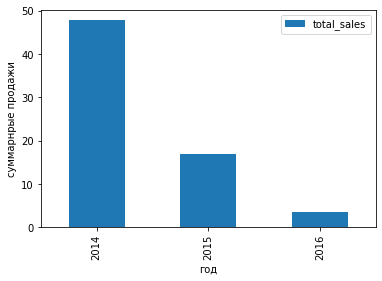

x360


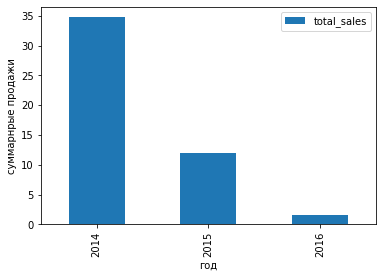

wiiu


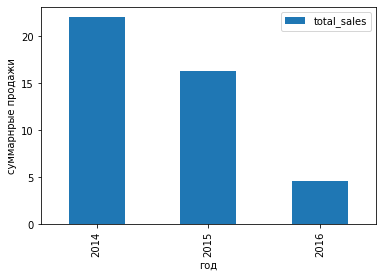

In [35]:
for platform in ttop_6.index[:6]:
    print(platform)
    (actual
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    
    plt.xlabel('год')
    plt.ylabel('суммарнрые продажи')
    plt.show() 

Показатели всех платформ опускаются, но данные за 2016 год могут быть неполными

##### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

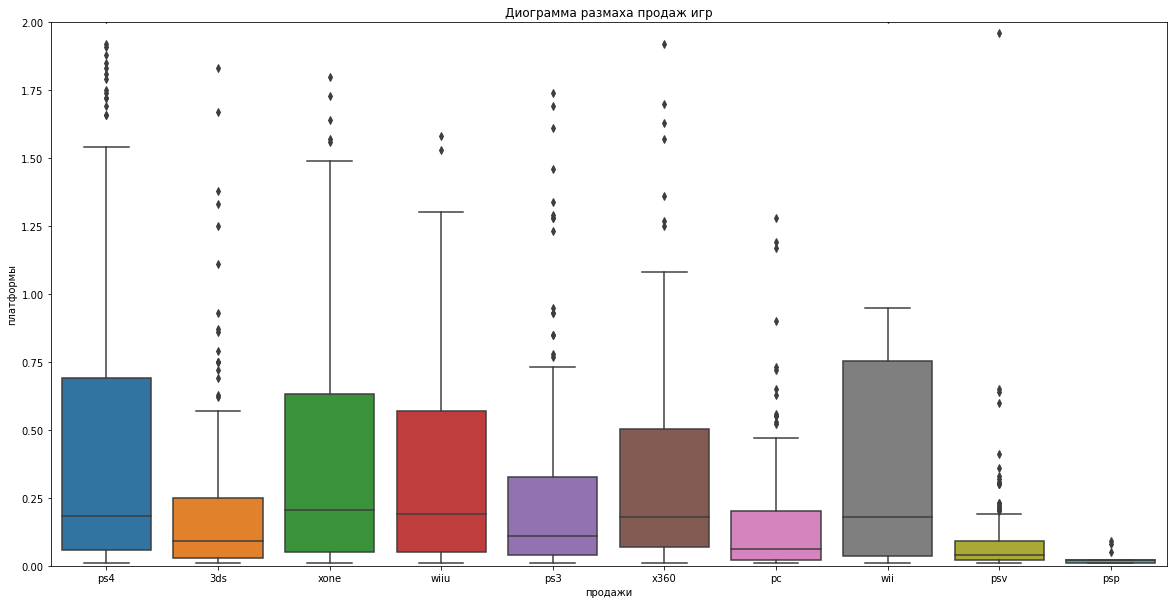

In [36]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=actual, x='platform', y='total_sales')

plt.ylim(0, 2)

plt.title('Диограмма размаха продаж игр')
plt.xlabel('продажи')
plt.ylabel('платформы')

plt.show()

Платформы с самым большим диапозоном значений: Wii
Платформы с самым большим размахам: PS4, X360 Wii WiiU XOne PS3

Потенциально прибыльные платформы:PS4, WiiU, XOne, 3DS

##### Влияние на продажи  отзывы пользователей и критиков

Влияние на продажи PS4
Корреляция между отзывами критиков и продажами: 0.4
Корреляция между отзывами пользователей и продажами: -0.0


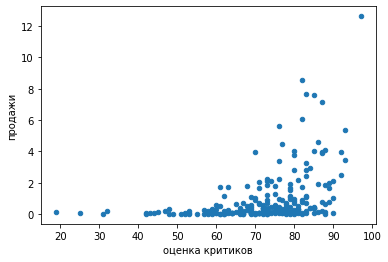

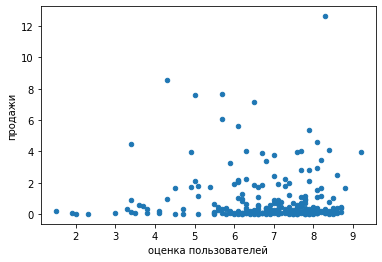

In [37]:
print('Влияние на продажи PS4')
actual.query('platform == "ps4"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('оценка критиков')
plt.ylabel('продажи')
plt.show
actual.query('platform == "ps4"').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи')
ps4c= actual.query('platform == "ps4"')['critic_score'].corr(actual.query('platform == "ps4"')['total_sales'])
ps4u = actual.query('platform == "ps4"')['user_score'].corr(actual.query('platform == "ps4"')['total_sales'])
print('Корреляция между отзывами критиков и продажами:', round(ps4c, 1))
print('Корреляция между отзывами пользователей и продажами:', round(ps4u, 1))

Из графиков видно, что корреляция между пользовательсикими оценками и продажами отсутсвует, корреляция между оценкой критиков слабая - 40%

Влияние на продажи XOne
Корреляция между отзывами критиков и продажами: 0.4
Корреляция между отзывами пользователей и продажами: -0.1


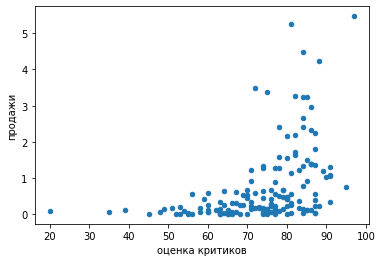

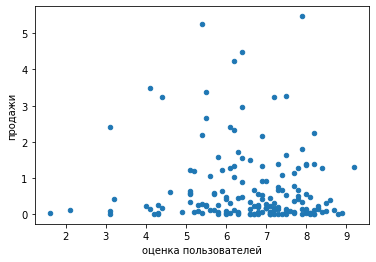

In [38]:
print('Влияние на продажи XOne')
actual.query('platform == "xone"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('оценка критиков')
plt.ylabel('продажи')
plt.show
actual.query('platform == "xone"').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи')
xonec= actual.query('platform == "xone"')['critic_score'].corr(actual.query('platform == "xone"')['total_sales'])
xoneu = actual.query('platform == "xone"')['user_score'].corr(actual.query('platform == "xone"')['total_sales'])
print('Корреляция между отзывами критиков и продажами:', round(xonec, 1))
print('Корреляция между отзывами пользователей и продажами:', round(xoneu, 1))

Замечаем наличие очень слабой отрицательной корреляции между отзывами пользователей и продажами.
Корреляция между оценкой критиков такая же, как и у PS4 - 40%

Влияние на продажи WiiU
Корреляция между отзывами критиков и продажами: 0.4
Корреляция между отзывами пользователей и продажами: 0.4


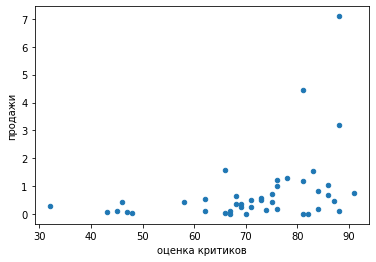

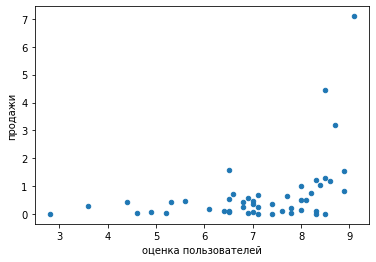

In [39]:
print('Влияние на продажи WiiU')
actual.query('platform == "wiiu"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('оценка критиков')
plt.ylabel('продажи')
plt.show
actual.query('platform == "wiiu"').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи')
wiiuc= actual.query('platform == "wiiu"')['critic_score'].corr(actual.query('platform == "wiiu"')['total_sales'])
wiiuu = actual.query('platform == "wiiu"')['user_score'].corr(actual.query('platform == "wiiu"')['total_sales'])
print('Корреляция между отзывами критиков и продажами:', round(wiiuc, 1))
print('Корреляция между отзывами пользователей и продажами:', round(wiiuu, 1))

Корреляция между отзывами критиков и отзывами пользователей одинаковая - 40%

Влияние на продажи 3DS
Корреляция между отзывами критиков и продажами: 0.3
Корреляция между отзывами пользователей и продажами: 0.2


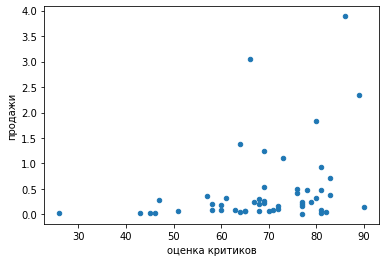

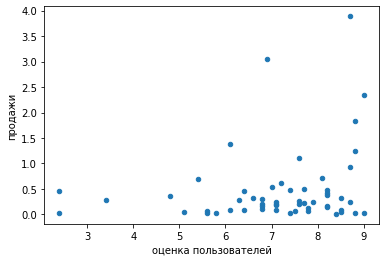

In [40]:
print('Влияние на продажи 3DS')
actual.query('platform == "3ds"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.xlabel('оценка критиков')
plt.ylabel('продажи')
plt.show
actual.query('platform == "3ds"').plot(x='user_score', y='total_sales', kind='scatter')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи')
dsc= actual.query('platform == "3ds"')['critic_score'].corr(actual.query('platform == "3ds"')['total_sales'])
dsu = actual.query('platform == "3ds"')['user_score'].corr(actual.query('platform == "3ds"')['total_sales'])
print('Корреляция между отзывами критиков и продажами:', round(dsc, 1))
print('Корреляция между отзывами пользователей и продажами:', round(dsu, 1))

Видим слабую корреляцию между отзывами критиков и отзывами пользователей

##### Общее распределение игр по жанрам

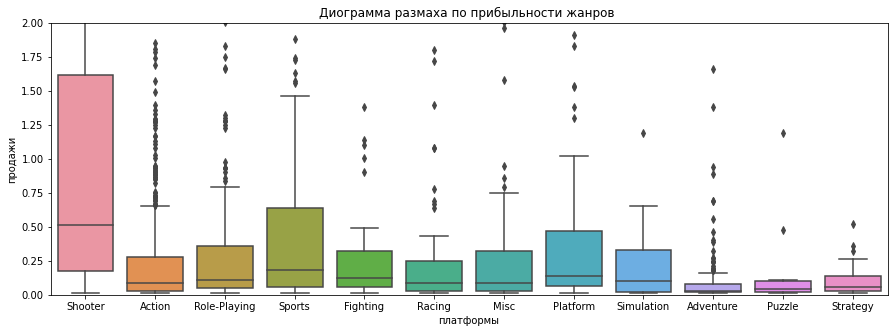

In [41]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=actual, x='genre', y='total_sales')

plt.ylim(0, 2)

plt.title('Диограмма размаха по прибыльности жанров ')
plt.xlabel('платформы')
plt.ylabel('продажи')

plt.show()

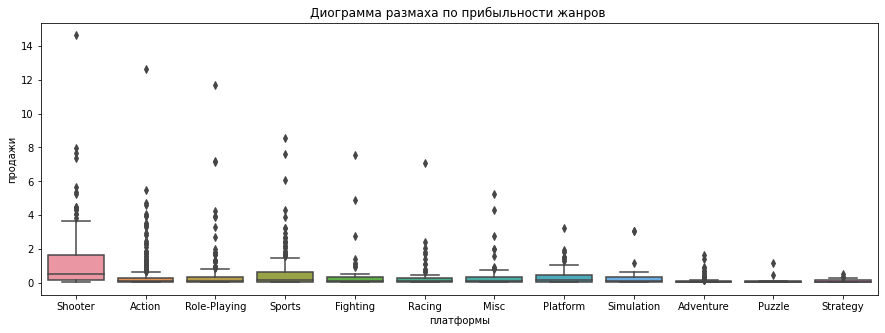

In [42]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=actual, x='genre', y='total_sales')


plt.title('Диограмма размаха по прибыльности жанров ')
plt.xlabel('платформы')
plt.ylabel('продажи')

plt.show()

*Вывод*
Shooter имеет самые выскоие медианные продажи, у остальных паказатели похожи. 
Более стабильные жанры: Shooter, Sports, Platform.
Самые высокие продажи: Shooter, Action, Role-Playing


#### Шаг Составьте портрет пользователя каждого региона

In [43]:
regions = actual.columns[4:7]

##### Самые популярные жанры (топ-5)

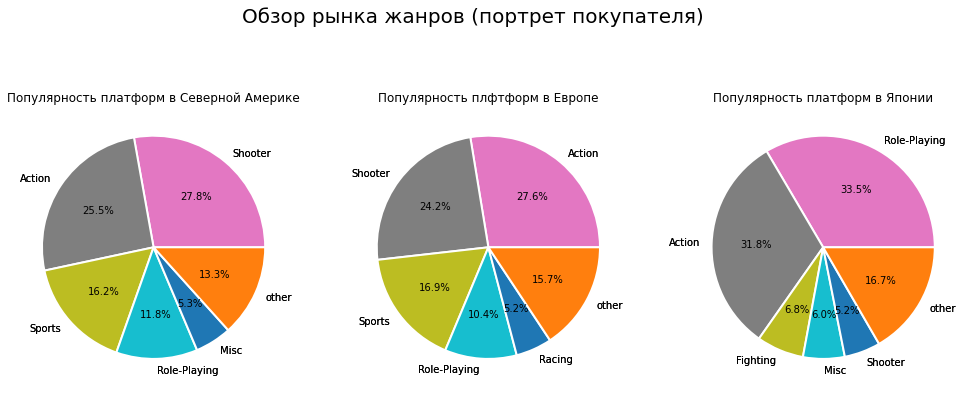

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(17, 7))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', size = 20)
for i in range(3):
    gen = (actual.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    
    gen = gen.append({'genre': 'other', regions[i]: actual[regions[i]].sum() - gen[regions[i]].sum()}, ignore_index= True)
    axs[i].pie(gen[regions[i]], labels = gen['genre'])
    axs[i].pie(gen[regions[i]], labels = gen['genre'], autopct='%1.1f%%',wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True})
    
    axs[0].set_title('Популярность платформ в Северной Америке')
    axs[1].set_title('Популярность плфтформ в Европе')
    axs[2].set_title('Популярность платформ в Японии')
    
plt.show()

*Вывод:* - Замечаем, что в Северной Америке и Европе  распределение почти одинакого. В обоих регионах самые востребованными жанрами были: Action,Shooter и Sports
        - В Японии большой процент занимают игры жанра Action и Role-Playing

##### Самые популярные платформы (топ-5)

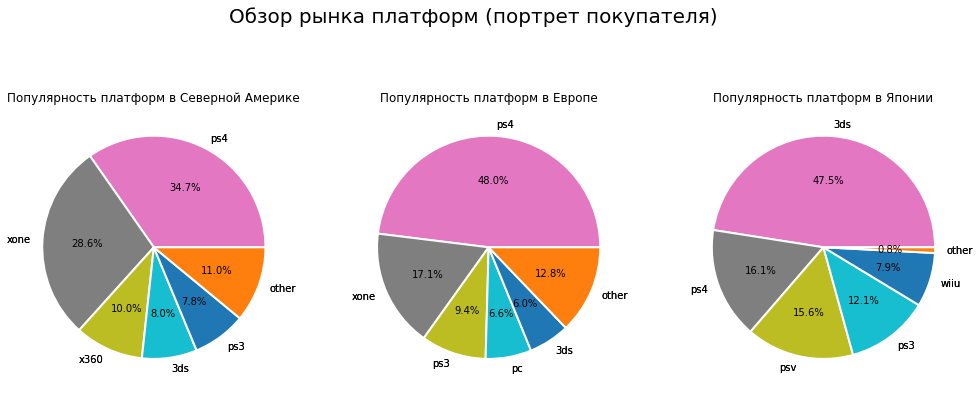

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(17, 7))
fig.suptitle('Обзор рынка платформ (портрет покупателя)',size = 20)
for i in range(3):
    pl = (actual.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    pl = pl.append({'platform': 'other', regions[i]: actual[regions[i]].sum() - pl[regions[i]].sum()},
                   ignore_index= True)
    axs[i].pie(pl[regions[i]], labels = pl['platform'])
    axs[i].pie(pl[regions[i]], labels = pl['platform'], autopct='%1.1f%%',wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True})

    axs[0].set_title('Популярность платформ в Северной Америке')
    axs[1].set_title('Популярность платформ в Европе')
    axs[2].set_title('Популярность платформ в Японии')
    
plt.show()
plt.show()

*Вывод:* - В Северной Америке и Европе видим почти одинаковое распределение. Преоблают плтформы: PS4 и XOne
        - В Японии отличается распределение по другим платформам, не вошедшим в топ-5, лидеры - 3DS и PS4

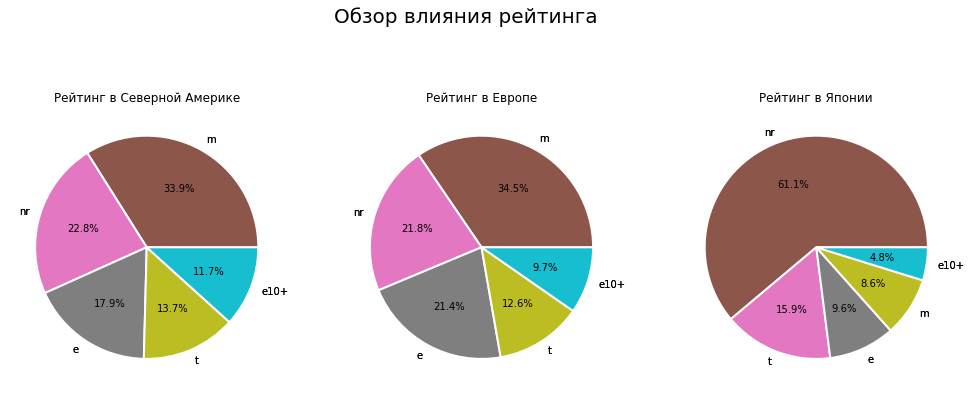

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(17, 7))
fig.suptitle('Обзор влияния рейтинга', size = 20)
for i in range(3):
    rat = (actual.groupby('rating')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    axs[i].pie(rat[regions[i]], labels = rat['rating'])
    axs[i].pie(rat[regions[i]], labels = rat['rating'], autopct='%1.1f%%',wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True})
    axs[0].set_title('Рейтинг в Северной Америке')
    axs[1].set_title('Рейтинг в Европе')
    axs[2].set_title('Рейтинг в Японии')
    
plt.show()

Распределение среди рейтингов в Северной Америке и Европе снова примерно одинаковое, преобладают игры с рейтингом М - "Для взрослых"
В Японии преобладают игры без рейтинга ESRB

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0=  средний пользовательский  рейтинг платформы Xbox One равен среднему рейтинг платформы PC
- H1 = средний пользовательский рейтинг платформы Xbox One не равен среднему рейтинг платформы PC

In [47]:
Xbox = actual[actual['platform']=="xone"]['user_score'].dropna() # Оценки пользователей Xbox One
PC = actual[actual['platform']=="pc"]['user_score'].dropna()

In [48]:
alpha = 0.05
results = st.ttest_ind(Xbox, PC, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('средний пользовательский  рейтинг платформы Xbox One', actual.query('platform == "xone"')['user_score'].mean())
print('средний пользовательский  рейтинг платформы PC ',actual.query('platform == "pc"')['user_score'].mean())   

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу
средний пользовательский  рейтинг платформы Xbox One 6.594545454545454
средний пользовательский  рейтинг платформы PC  6.298360655737704


Полученное значение p-value говорит о том, что с вероятностью в почти 12%  средний пользовательский рейтинг платформы Xbox One может быть равен среднему рейтингу платформы PC

In [49]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


*Вывод*: средний пользовательский рейтинг платформы Xbox One может быть равен среднему рейтинг платформы PC

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- H0= Средние пользовательские рейтинги жанров Action равен среднему показателю пользовательского рейтинга жанра Sports
- H1 = Средние пользовательские рейтинги жанров Action не равен среднему показателю пользовательского рейтинга жанра Sports

In [50]:
Action = actual[actual['genre']=="Action"]['user_score'].dropna()
Sports = actual[actual['genre']=="Sports"]['user_score'].dropna()

In [51]:
alpha = 0.05
results_1 = st.ttest_ind(Action, Sports, equal_var=False)
print('p-значение:', results.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('средний пользовательский  рейтинг жанра Action', actual.query('genre == "Action"')['user_score'].mean())
print('средний пользовательский  рейтинг жанра Sports ',actual.query('genre == "Sports"')['user_score'].mean())   

p-значение: 0.1912450522572209
Отвергаем нулевую гипотезу
средний пользовательский  рейтинг жанра Action 6.760606060606061
средний пользовательский  рейтинг жанра Sports  5.225196850393701


*Вывод:* средний пользовательский рейтинги жанров Action не равен среднему показателю пользовательского рейтинга жанра Sports с вероятностью ошибки в 19%   

####  Шаг  Общий вывод

1. Изучили общую информацию и подготовили данные:
-  привели название столбцов и данных в нижний регистр
-  поменяли тип данных в столбце Year_of_Release на int, столбец User_Score на float64 для удобства работы
- удалили пропуски в столбцах year_of_release, genre,name их было мало, большое количество продаж они не принесли и заменить каким-либо другим значением невозможно
- большое количество пропусков было в столбце critic_score, user_score заменить их нет возможности, поэтому оставили без изменений
- удалили дубликаты
- Заменили K-A на E10+ в столбце рейтинг, так как эти обозначение одного и того же, заменили nan на nr- без рейтинга
2.Провели исследовательский анализ данных и обнаружили:
- В период с 1980 по 1993 игры почти не выпускались.
- За всё время лидеры среди платформ:  PS2, X360, PS3, Wii, DS, PS
- Больше всего продаж:
 -  	PS2 в 2002, 2004 год
 - 	X360 в 2008, 2010, 2011 год
 -	PS3 с 2008-2011 года
 -	Wii с 2006- 2009 года
 -	DS 2005, 2007, 2008 год
 -	PS с 1997-1999 год

- Срок, за который появляются и исчезают новые платформы - 10-12 лет. Актуальность сохраняется 2-4 года.  
Вывод: Анализировать весь массив данных необязательно. 
- Создали новый датасет за промежуток времени 2014-2016 год. Дальнейшее исследование проводилось на его базе. 
- Снова произвели анализ платформ и заметили разницу.
- В топе появились новые платформы: PS4,3DS, XOne, PC. Осталась и поднялась в топе PS3. На той же позиции осталась X360.
-Построили  график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
-Вывели на его основе  список потенциально прибыльных платформ: :PS4, WiiU, XOne, 3DS
Проанализировали, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Для PS4: корреляция между пользовательсикими оценками и продажами отсутсвует, корреляция между оценкой критиков слабая - 40%
- Для XOne : очень слабая отрицательной корреляция между отзывами пользователей и продажами. Корреляция между оценкой критиков такая же, как и у PS4 - 40%
- Для WiiU: Корреляция между отзывами критиков и отзывами пользователей одинаковая - 40%
- Для 3DS:  слабая корреляцию между отзывами критиков и отзывами пользователей

Рассмотрели общее распределение игр по жанрам.
Можно отметить следующие жанры:

-	Shooter 
-	Action 
-	Sports
жанры с низкими продажами: Strategy, Puzzle
4. Провели анализ по регионам (Северная Америка, Европа, Япония)
- В Северной Америке и Европе спросом пользуются жанры Action и Shooter, в Японии - Role-Playing и Action . Самая популярна платформа в Северной Америке и в Европе PS4, в Японии - 3DS
- Проверили, влияет ли рейтинг ESRB на продажи в отдельном регионе.
- Распределение среди рейтингов в Северной Америке и Европе снова примерно одинаковое, преобладают игры с рейтингом М - "Для взрослых"
В Японии преобладают игры без рейтинга ESRB
5. Проверили гипотезы.
Проверьте гипотезы
- Средний пользовательский рейтинг платформы Xbox One может быть равен среднему рейтингу платформы PC с вероятностью в почти 12%
- Средний пользовательский рейтинг  жанров Action не равен среднему показателю пользовательского рейтинга жанра Sports с вероятностью ошибки в 19%

 **ИТОГ**

Потенциально популярный продукт- компьютерная игра в жанре Action, Shooter, Role-Playing на платформе-PS4,  3DS
Потенциальная группа пользователей-  взрослые люди от  17 лет 
